In [52]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from google.colab import files

In [11]:
uploaded = files.upload()

Saving property-tax-report-reduced.csv to property-tax-report-reduced (1).csv


In [41]:
df_original = pd.read_csv(io.BytesIO(uploaded['property-tax-report.csv']))
df = df_original
df.head()

,ZONING_CLASSIFICATION,CURRENT_LAND_VALUE,PREVIOUS_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,One-Family Dwelling,1352000.0,1229000.0,264000.0,2021.0,259000.0,2001.0,6455.75,21
1,One-Family Dwelling,1573000.0,1430000.0,309000.0,2021.0,317000.0,1990.0,7285.14,21
2,One-Family Dwelling,1283000.0,1167000.0,120000.0,2021.0,127000.0,1985.0,5746.26,21
3,One-Family Dwelling,1297000.0,1179000.0,143000.0,2021.0,152000.0,1987.0,5840.40,21
4,One-Family Dwelling,1094000.0,1030000.0,51000.0,2021.0,47900.0,1965.0,5035.26,20


In [42]:
df['2021'] = 0
df['2020'] = 0
df['2019'] = 0

df.head()

,ZONING_CLASSIFICATION,CURRENT_LAND_VALUE,PREVIOUS_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,2021,2020,2019
0,One-Family Dwelling,1352000.0,1229000.0,264000.0,2021.0,259000.0,2001.0,6455.75,21,0,0,0
1,One-Family Dwelling,1573000.0,1430000.0,309000.0,2021.0,317000.0,1990.0,7285.14,21,0,0,0
2,One-Family Dwelling,1283000.0,1167000.0,120000.0,2021.0,127000.0,1985.0,5746.26,21,0,0,0
3,One-Family Dwelling,1297000.0,1179000.0,143000.0,2021.0,152000.0,1987.0,5840.40,21,0,0,0
4,One-Family Dwelling,1094000.0,1030000.0,51000.0,2021.0,47900.0,1965.0,5035.26,20,0,0,0


In [ ]:
df.dropna(inplace=True) 

indexes_to_drop = []

for index, row in df.iterrows():
  if row['TAX_ASSESSMENT_YEAR'] == 2021:
    df.at[index, '2021'] = row['CURRENT_LAND_VALUE']
    df.at[index, '2020'] = row['PREVIOUS_LAND_VALUE']
  elif row['TAX_ASSESSMENT_YEAR'] == 2020:
    df.at[index, '2020'] = row['CURRENT_LAND_VALUE']
    df.at[index, '2019'] = row['PREVIOUS_LAND_VALUE']
  else:
    continue

df.head()

In [50]:
count_2019_one = 0
count_2020_one = 0
count_2021_one = 0
sum_2019_one = 0
sum_2020_one = 0
sum_2021_one = 0

count_2019_two = 0
count_2020_two = 0
count_2021_two = 0
sum_2019_two = 0
sum_2020_two = 0
sum_2021_two = 0

count_2019_multi = 0
count_2020_multi = 0
count_2021_multi = 0
sum_2019_multi = 0
sum_2020_multi = 0
sum_2021_multi = 0


for index, row in df.iterrows():
  if row['ZONING_CLASSIFICATION'] == 'One-Family Dwelling':
    if(row['2019']):
      count_2019_one +=1
      sum_2019_one += row['2019']
    if(row['2020']):
      count_2020_one +=1
      sum_2020_one += row['2020']
    if(row['2021']):
      count_2021_one +=1
      sum_2021_one += row['2021']
  elif row['ZONING_CLASSIFICATION'] == 'Two-Family Dwelling':
    if(row['2019']):
      count_2019_two +=1
      sum_2019_two += row['2019']
    if(row['2020']):
      count_2020_two +=1
      sum_2020_two += row['2020']
    if(row['2021']):
      count_2021_two +=1
      sum_2021_two += row['2021']
  elif row['ZONING_CLASSIFICATION'] == 'Multiple Dwelling':
    if(row['2019']):
      count_2019_multi +=1
      sum_2019_multi += row['2019']
    if(row['2020']):
      count_2020_multi +=1
      sum_2020_multi += row['2020']
    if(row['2021']):
      count_2021_multi +=1
      sum_2021_multi += row['2021']


avg_2019_one = sum_2019_one/count_2019_one
avg_2020_one = sum_2020_one/count_2020_one
avg_2021_one = sum_2021_one/count_2021_one

avg_2019_two = sum_2019_two/count_2019_two
avg_2020_two = sum_2020_two/count_2020_two
avg_2021_two = sum_2021_two/count_2021_two

avg_2019_multi = sum_2019_multi/count_2019_multi
avg_2020_multi = sum_2020_multi/count_2020_multi
avg_2021_multi = sum_2021_multi/count_2021_multi

data = {'Zone_Classification':['One-Family Dwelling', 'Two-Family Dwelling', 'Multiple Dwelling'],
        '2019':[avg_2019_one, avg_2019_two, avg_2019_multi], '2020':[avg_2020_one, avg_2020_two, avg_2020_multi], '2021':[avg_2021_one, avg_2021_two, avg_2021_multi]}


In [51]:
results = pd.DataFrame(data)
results

,Zone_Classification,2019,2020,2021
0,One-Family Dwelling,2.272465e+06,1.957314e+06,2.125256e+06
1,Two-Family Dwelling,1.648002e+06,1.435885e+06,1.541660e+06
2,Multiple Dwelling,1.380848e+06,1.264793e+06,1.235255e+06


Text(0, 0.5, 'Land Values (xe6)')

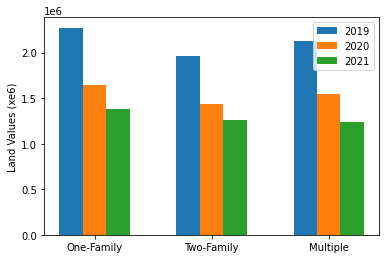

In [59]:
x = np.arange(3)
y1 = [avg_2019_one, avg_2020_one, avg_2021_one]
y2 = [avg_2019_two, avg_2020_two, avg_2021_two]
y3 = [avg_2019_multi, avg_2020_multi, avg_2021_multi]
width = 0.20

plt.bar(x-0.2, y1, width)
plt.bar(x, y2, width)
plt.bar(x+0.2, y3, width)
plt.xticks(x, ['One-Family', 'Two-Family', 'Multiple'])
plt.legend(["2019", "2020", "2021"])
plt.ylabel("Land Values (xe6)")